Topic extraction from user reivews on TripAdvisor

https://colab.research.google.com/drive/1AvhEJTl6NprW7QO7RF_v3HRbzSlAANTv?usp=drive_link

Step - 1: Text Analysis
  * Loading configuration YAML
  * Creating filters specified in the configuration
  * Loading the csv data into Pandas dataframe



In [105]:
!python3 -m pip install nltk
!python3 -m nltk.downloader punkt
!python3 -m nltk.downloader stopwords
!python3 -m nltk.downloader wordnet
!python -m pip install pyyaml

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package wordnet to /root/nltk_data.

In [106]:
import pandas as pd
import requests
import yaml

tripadvisor_review_data = 'https://raw.githubusercontent.com/krishanuc/CapstoneProjectData/refs/heads/tripadvisor-dataset/tripadvisor/tripadvisor_hotel_reviews.csv'
tripadvisor_config = 'https://raw.githubusercontent.com/krishanuc/CapstoneProjectData/refs/heads/tripadvisor-dataset/tripadvisor/tripadvisor_config.yaml'

def open_yaml_from_uri(uri):
    response = requests.get(uri)
    response.raise_for_status()  # Raise an exception for bad status codes

    yaml_data = yaml.safe_load(response.text)
    return yaml_data

config = open_yaml_from_uri(tripadvisor_config)
# print(config)

rating_level_filter = config['rating_level_filter']
stop_word_filtering = config['stop_word_filtering']
manual_stop_word_filtering = config['manual_stop_word_filtering']
lemmetization = config['lemmetization']

# Load thre review data from csv file into Pandas data frame
ta_reviews_df = pd.read_csv(tripadvisor_review_data)

# Print info to check columns types, rows count, and if there are null values in the columns
# print(ta_reviews_df.info())
# print(ta_reviews_df['Review'].dtypes)
# print(list(ta_reviews_df.columns))
# print(ta_reviews_df['Review'])
ta_reviews_df['Review'] = ta_reviews_df['Review'].astype('string')
print(ta_reviews_df['Review'].dtypes)

print("Rating level filter : ", rating_level_filter)
ta_reviews_df = ta_reviews_df[ta_reviews_df['Rating'] <= rating_level_filter]

pd.set_option('display.max_colwidth', None)
ta_reviews_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


string
Rating level filter :  5


,Review,Rating
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,",4
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival no champagne strawberries no foam pillows great room view alley high rise building good not better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this not 4 start hotel clean business hotel super high rates, better chain hotels seattle,",2
2,"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book mediterranean suite 3 night weekend stay 1st choice rest party filled, comparison w spent 45 night larger square footage room great soaking tub whirlpool jets nice shower.before stay hotel arrange car service price 53 tip reasonable driver waiting arrival.checkin easy downside room picked 2 person jacuzi tub no bath accessories salts bubble bath did n't stay, night got 12/1a checked voucher bottle champagne nice gesture fish waiting room, impression room huge open space felt room big, tv far away bed chore change channel, ipod dock broken disappointing.in morning way asked desk check thermostat said 65f 74 2 degrees warm try cover face night bright blue light kept, got room night no, 1st drop desk, called maintainence came look thermostat told play settings happy digital box wo n't work, asked wakeup 10am morning did n't happen, called later 6pm nap wakeup forgot, 10am wakeup morning yep forgotten.the bathroom facilities great room surprised room sold whirlpool bath tub n't bath amenities, great relax water jets going,",3
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy, goldfish n

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


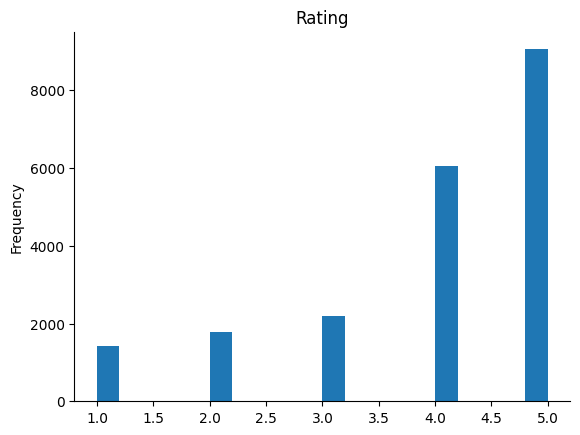

In [107]:
# @title Rating

from matplotlib import pyplot as plt
ta_reviews_df['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


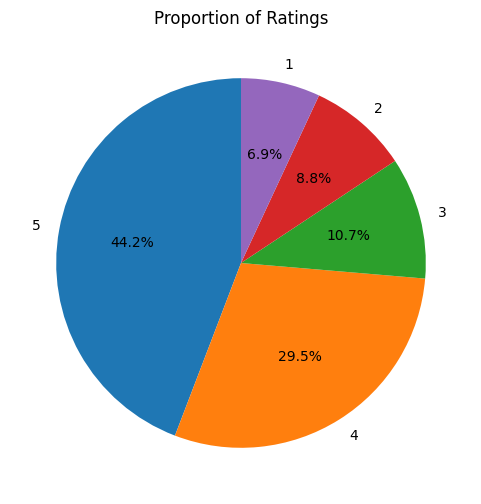

In [108]:
# @title Proportion of Ratings

import matplotlib.pyplot as plt

rating_counts = ta_reviews_df['Rating'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
_ = plt.title('Proportion of Ratings')

Step - 2 : Text Cleanup
  * Removal of hyperlinks
  * Removal of @ mentions
  * Removal of hashtag
  * Removal of punctuations
  * Converting text to lower case

In [109]:
import re

# Convert Review column as string
ta_reviews_df['Review'] = ta_reviews_df['Review'].astype('string')

print(ta_reviews_df.dtypes)

# Some basic pre-processing
# Remove links
ta_reviews_df['Review'] = ta_reviews_df['Review'].apply(lambda x: re.sub(r"(www|http|https|pic)([a-zA-Z\.0-9:=\\~#/_\&%\?\-])*", ' ', x))

# Remove mention symbol
ta_reviews_df['Review'] = ta_reviews_df['Review'].apply(lambda x: x.replace('@', ''))

# Remove hashtag symbol
ta_reviews_df['Review'] = ta_reviews_df['Review'].apply(lambda x: x.replace('#', ''))

# Remove punctuations
ta_reviews_df['Review'] = ta_reviews_df['Review'].astype('string').apply(lambda x: re.sub(r"[^\w\s]", '',x))

# Convert all text to lower case (this helps in vectorization and training)
ta_reviews_df['Review'] = ta_reviews_df['Review'].apply(lambda x: x.lower())

#print(ta_reviews_df.dtypes)

# Print info after pre-processing
#print(ta_reviews_df.info())

pd.set_option('display.max_colwidth', None)

ta_reviews_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Review    string[python]
Rating             int64
dtype: object


,Review,Rating
0,nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed nonexistent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe just noisy neighbors aveda bath products nice did not goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience having pay 40 parking night,4
1,ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle start booked suite paid extra website description not suite bedroom bathroom standard hotel room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting room bathroom bedroom unlike kimpton calls suite 5 day stay offer correct false advertising send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution send email trip guest survey did not follow email mail guess tell concerned guestthe staff ranged indifferent not helpful asked desk good breakfast spots neighborhood hood told no hotels gee best breakfast spots seattle 12 block away convenient hotel does not know exist arrived late night 11 pm inside run bellman busy chating cell phone help bagsprior arrival emailed hotel inform 20th anniversary half really wanted make sure good got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate told needed foam pillows arrival no champagne strawberries no foam pillows great room view alley high rise building good not better housekeeping staff cleaner room property impressed left morning shopping room got short trips 2 hours beds comfortablenot good acheat control 4 x 4 inch screen bring green shine directly eyes night light sensitive tape controlsthis not 4 start hotel clean business hotel super high rates better chain hotels seattle,2
2,nice rooms not 4 experience hotel monaco seattle good hotel nt 4 levelpositives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed 3 separate wakeup calls concierge busy hard touch did nt provide guidance special requeststv hard use ipod sound dock suite non functioning decided book mediterranean suite 3 night weekend stay 1st choice rest party filled comparison w spent 45 night larger square footage room great soaking tub whirlpool jets nice showerbefore stay hotel arrange car service price 53 tip reasonable driver waiting arrivalcheckin easy downside room 2 person jacuzi tub no bath accessories salts bubble bath did nt stay night got 121a checked voucher bottle champagne nice gesture fish waiting room impression room huge open space felt room big tv far away bed chore change channel ipod dock broken disappointingin morning way asked desk check thermostat said 65f 74 2 degrees warm try cover face night bright blue light kept got room night no 1st drop desk called maintainence came look thermostat told play settings happy digital box wo nt work asked wakeup 10am morning did nt happen called later 6pm nap wakeup forgot 10am wakeup morning yep forgottenthe bathroom facilities great room surprised room sold whirlpool bath tub nt bath amenities great relax water jets going,3
3,unique great stay wonderful time hotel monaco location excellent short stroll main downtown shopping area pet friendly room showed no signs animal hair smells monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy goldfish named brandi enjoyed did nt partake free wine coffeetea service lobby thought great feature great


Step 3 : Text preprocessing and topic extraction using Latent Dirichlet Allocation (LDA).
  * Tokenization
  * Stop word filtering
  * Lemmatization
  * Topic extraction

In [116]:
import gensim
from gensim import corpora
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

merged_ta_reviews = ta_reviews_df['Review'].tolist()
#print(merged_ta_reviews)

# Preprocess the text (tokenization, stopwords removal)
stop_words = set(stopwords.words("english"))

print('Number of stop words = ', len(stop_words))
print(stop_words)

manual_stop_words = ["hotel"]

lemmatizer = WordNetLemmatizer()

def override_configuration():
    global stop_word_filtering
    stop_word_filtering = False

def print_lemmatized_token(intial_token_list, lemmatized_token_list):
    count = 0;
    for index in range(len(intial_token_list)):
      if lemmatized_token_list[index] != intial_token_list[index]:
        # print(intial_token_list[index], lemmatized_token_list[index])
        count += 1
    print("Lemmatized ", count, " of ", len(lemmatized_token_list), " words")

def preprocess(doc):
    tokens = word_tokenize(doc.lower())
    # converts the words in tokens to lower case and then checks whether
    # they are present in stop_words or not
    filtered_tokens = [wd for wd in tokens if not wd.lower() in stop_words] if stop_word_filtering else tokens
    manually_filtered_tokens = [fw for fw in filtered_tokens if not fw.lower() in manual_stop_words] if manual_stop_word_filtering else filtered_tokens

    # Lemmatizing words
    lemmatized_filtered_tokens = [lemmatizer.lemmatize(token) for token in manually_filtered_tokens] if lemmetization else manually_filtered_tokens
    # print_lemmatized_token(manually_filtered_tokens, lemmatized_filtered_tokens)
    return lemmatized_filtered_tokens

override_configuration()

print("Stop word filtering : ", stop_word_filtering)
print("Manual stop word filtering : ", manual_stop_word_filtering)
print("Lemmetization : ", lemmetization)

# Preprocess all documents
processed_docs = [preprocess(doc) for doc in merged_ta_reviews]

# Create a dictionary and a document-term matrix
dictionary = corpora.Dictionary(processed_docs)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_docs]

# Apply LDA
lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=4, id2word=dictionary)

# Print topics
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Number of stop words =  179
{"mustn't", 'if', "it's", 'its', 'o', "doesn't", "you've", 'because', 'so', 'above', 'own', 'our', 'nor', 'about', 'him', 'themselves', 'does', "haven't", 'mustn', 'again', 'not', 'being', 'further', 'or', 'isn', 'any', "aren't", 'haven', 'don', 'up', 'but', "didn't", 'a', "you'd", 'them', 'other', 'of', 'when', 'same', 'yourselves', 'shan', 'this', 'once', "shan't", 'm', 'between', 'by', "don't", 'aren', 'did', 'the', "that'll", 'all', 'at', "needn't", 'i', 'in', "wasn't", 'her', 'they', 'herself', 'should', 'itself', 'and', 'each', 'will', 're', 'weren', 've', 'll', 'those', 'before', 'now', "she's", 'you', 'doesn', 'ours', 'which', 'during', 'hadn', 'can', "you'll", 'then', 'your', 'only', "shouldn't", 'until', 'below', 'than', 'has', 'myself', 'just', 'd', 'where', 'from', 'mightn', 'hers', 'wouldn', 'my', "won't", 'ourselves', 'am', 'through', 's', 'under', "hadn't", 'into', 'after', 'an', 'needn', 'had', 'such', 'against', 'ma', "isn't", 'y', 'down', '

Visualize the words in the topic

In [111]:
!pip install pyLDAvis==3.4.1  # Install pyLDAvis for visualization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Visualization of topic based on principal components based partitioning

In [117]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()  # Enable visualization in Colab

# Prepare the data for visualization
vis_data = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)

# Display the visualization
pyLDAvis.display(vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Word cloud plots

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


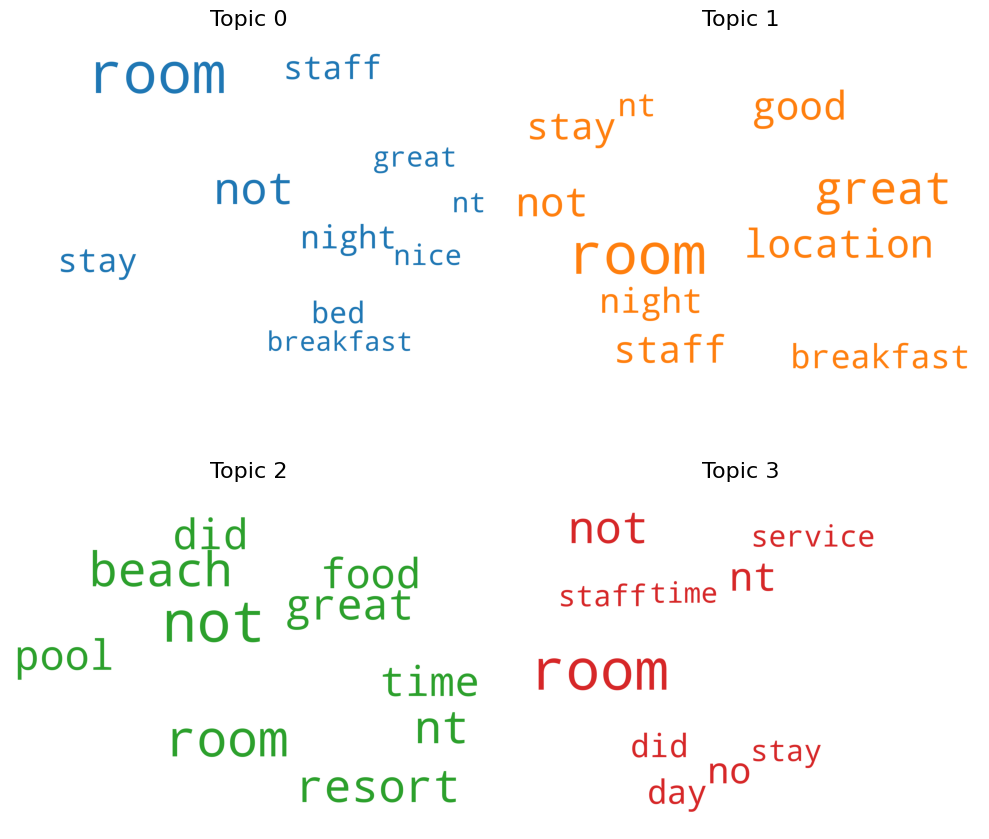

In [118]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()